In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Bidirectional
import matplotlib.pyplot as plt
# plt.style.use('fivethirtyeight')
import yfinance as yf

2023-11-17 12:54:15.284277: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-17 12:54:15.320614: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-17 12:54:15.574193: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-17 12:54:15.575544: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-17 12:54:16.493942: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
df = yf.download('SUZLON.NS',start='2000-01-01',end='2023-09-16')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-10-19,127.800003,139.740005,116.050003,138.570007,136.711136,152125030
2005-10-20,140.199997,141.550003,127.400002,129.380005,127.644409,39078530
2005-10-21,127.050003,139.000000,127.050003,134.770004,132.962097,25623135
2005-10-24,137.399994,138.000000,129.660004,130.789993,129.035477,11125060
2005-10-25,128.259995,132.729996,128.259995,131.839996,130.071396,6320275
...,...,...,...,...,...,...
2023-09-11,24.299999,24.400000,23.750000,24.000000,24.000000,93344063
2023-09-12,24.150000,24.200001,22.799999,22.799999,22.799999,146034046
2023-09-13,22.200001,22.500000,21.700001,22.150000,22.150000,236321372


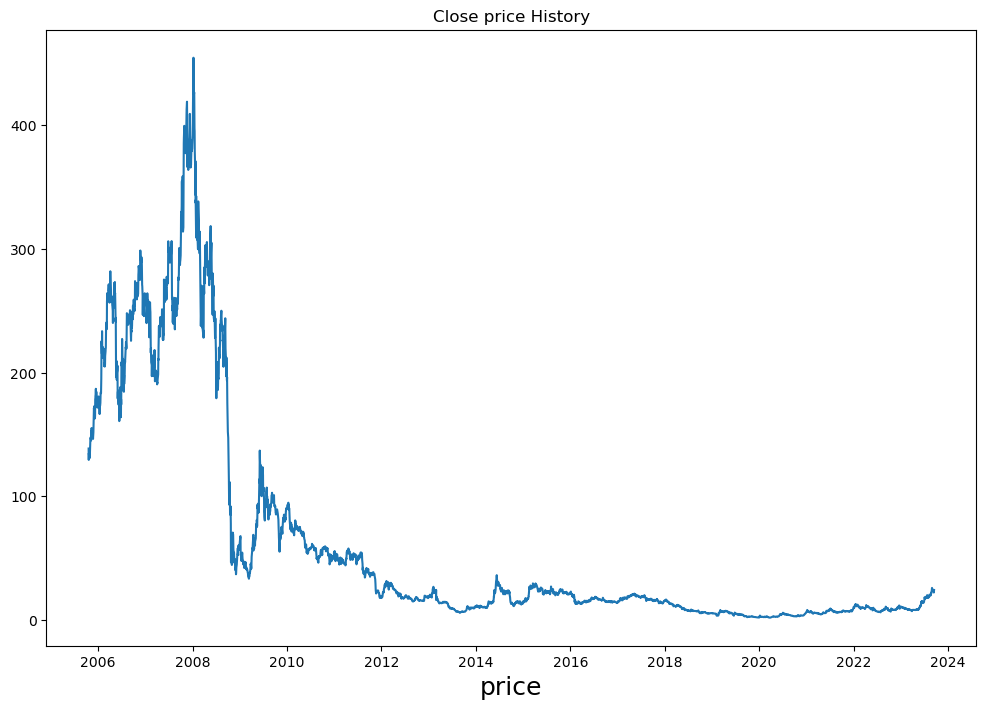

In [3]:
plt.figure(figsize=(12,8))
plt.title('Close price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.xlabel('price',fontsize=18)
plt.show()

In [5]:
data = df.filter(['Adj Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*0.1)
x=df
print(x)
training_data_len = math.ceil(len(dataset))
dataset.shape

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2005-10-19  127.800003  139.740005  116.050003  138.570007  136.711136   
2005-10-20  140.199997  141.550003  127.400002  129.380005  127.644409   
2005-10-21  127.050003  139.000000  127.050003  134.770004  132.962097   
2005-10-24  137.399994  138.000000  129.660004  130.789993  129.035477   
2005-10-25  128.259995  132.729996  128.259995  131.839996  130.071396   
...                ...         ...         ...         ...         ...   
2023-09-11   24.299999   24.400000   23.750000   24.000000   24.000000   
2023-09-12   24.150000   24.200001   22.799999   22.799999   22.799999   
2023-09-13   22.200001   22.500000   21.700001   22.150000   22.150000   
2023-09-14   22.350000   23.250000   21.750000   23.250000   23.250000   
2023-09-15   23.600000   24.400000   23.150000   24.200001   24.200001   

               Volume  
Date         

(4419, 1)

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.29948014],
       [0.27936098],
       [0.29116099],
       ...,
       [0.04526781],
       [0.04770872],
       [0.04981678]])

In [7]:
train_data  = scaled_data[0:training_data_len,:]
x_train = []
y_train = []
for i in range(40,len(train_data)):
    x_train.append(train_data[i-40:i,0])
    y_train.append(train_data[i,0])
    if i <= 40:
        print(x_train)
        print(y_train)
        print()

[array([0.29948014, 0.27936098, 0.29116099, 0.28244778, 0.28474649,
       0.29731273, 0.29203669, 0.28319211, 0.3090033 , 0.3188549 ,
       0.3188549 , 0.3137102 , 0.33047979, 0.32299259, 0.32975729,
       0.33575586, 0.32551024, 0.32513802, 0.33054547, 0.32708646,
       0.32191986, 0.31651244, 0.32032169, 0.32150389, 0.32848763,
       0.35572177, 0.37111213, 0.36885716, 0.37428651, 0.36288057,
       0.36618633, 0.35585315, 0.35278816, 0.3581737 , 0.38597709,
       0.39315779, 0.39569734, 0.40524241, 0.39136259, 0.40044799])]
[0.39891551020983085]



In [8]:
x_train,y_train = np.array(x_train),np.array(y_train)

In [9]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(4379, 40, 1)

In [10]:
model = Sequential()
model.add((LSTM(50,return_sequences=True,input_shape = (x_train.shape[1],1))))
model.add((LSTM(50,return_sequences=False,input_shape = (x_train.shape[1],1))))
model.add(Dense(25))
model.add(Dense(1))


In [11]:
model.compile(optimizer='adam',loss='mse')


In [12]:
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
137/137 [==============================] - 5s 17ms/step - loss: 0.0026
Epoch 2/50
137/137 [==============================] - 2s 16ms/step - loss: 3.8480e-04
Epoch 3/50
137/137 [==============================] - 2s 14ms/step - loss: 3.4130e-04
Epoch 4/50
137/137 [==============================] - 2s 14ms/step - loss: 3.2660e-04
Epoch 5/50
137/137 [==============================] - 2s 13ms/step - loss: 2.7379e-04
Epoch 6/50
137/137 [==============================] - 2s 14ms/step - loss: 2.3980e-04
Epoch 7/50
137/137 [==============================] - 2s 14ms/step - loss: 2.4373e-04
Epoch 8/50
137/137 [==============================] - 2s 14ms/step - loss: 2.3058e-04
Epoch 9/50
137/137 [==============================] - 2s 14ms/step - loss: 2.3030e-04
Epoch 10/50
137/137 [==============================] - 2s 14ms/step - loss: 1.8025e-04
Epoch 11/50
137/137 [==============================] - 2s 14ms/step - loss: 1.6240e-04
Epoch 12/50
137/137 [==============================] - 2